In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# About Data
# The data is succesfully scrapped from imdb about netflix movies and tvshows.This dataset need clever programming knowledge for feature extraction also you can build a RECOMMENDATION system either GENRE prediction model
# ABOUT Columns:
# 
# MOVIES:
#          The movie names are given under the column
# YEAR:
#         The year of movie or tv shows telecast for audience
# GENRE:
#         The dataset contain many genres most valuable for recommendation system
# RATING:
#           The audience thought about movie or tv show given
# ONE-LINE:
#            The short description about movie or tv show for audiences first impression
# STARS:
#             The casting of art is define under this columns which makes talk between audience 
# VOTES:
#             The audience express their view under the columns its useful to identify impact make by art 
# RUNTIME:
#             The duration for runing time of art
# GROSS:
#             It gives the total amount earned in worldwide

In [2]:
movies = pd.read_csv("movies.csv")
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
movies.shape

(9999, 9)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [5]:
movies.isna().sum().sort_values(ascending=False)

Gross       9539
RunTime     2958
RATING      1820
VOTES       1820
YEAR         644
GENRE         80
MOVIES         0
ONE-LINE       0
STARS          0
dtype: int64

# **Analysis of different columns values**

## Analysis Focus area: Movie Ratings as per RunTime

### Renaming Column ONE-LINE to ONE_LINE so that it can be used in pandas

In [6]:
movies.rename(columns = {'ONE-LINE':'ONE_LINE'}, inplace = True)   

In [7]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE_LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [8]:
# Rating Column "na" values
movies[movies.RATING.isna()]

,MOVIES,YEAR,GENRE,RATING,ONE_LINE,STARS,VOTES,RunTime,Gross
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
24,He-Man and the Masters of the Universe,(2021– ),"\nAnimation, Action, Adventure",NaN,\nEternia's Prince Adam discovers the power of...,\n,NaN,NaN,NaN
214,Sing 2,(2021),"\nAnimation, Adventure, Comedy",NaN,\nBuster Moon and his friends must persuade re...,\n Director:\nGarth Jennings\n| \n Stars...,NaN,NaN,NaN
217,Knives Out 2,(2022),"\nComedy, Crime, Drama",NaN,\nPlot unknown. Sequel to the 2019 film 'Knive...,\n Director:\nRian Johnson\n| \n Stars:\...,NaN,NaN,NaN
222,Don't Look Up,(2021),\nComedy,NaN,"\nThe story of two low-level astronomers, who ...",\n Director:\nAdam McKay\n| \n Stars:\nT...,NaN,145.0,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [9]:
movies.RATING.isna().sum()

1820

In [10]:
movies.shape

(9999, 9)

In [11]:
(1820/9999)*100

18.201820182018203

In [12]:
mode_RatingVal = movies.RATING.mode()[0]
mode_RatingVal

7.2

In [13]:
movies.RATING.value_counts(normalize=True)

7.2    0.040469
7.6    0.037780
7.5    0.037780
7.4    0.036679
7.3    0.036557
         ...   
1.8    0.000122
1.1    0.000122
2.0    0.000122
2.4    0.000122
2.2    0.000122
Name: RATING, Length: 82, dtype: float64

#### Since Rating is an Categorical variable also the na values are about 18% of entire dataset we will not drop but rather will fill in with most frequent value using Mode

In [14]:
movies.RATING.fillna(mode_RatingVal,inplace=True)
movies.RATING.value_counts(normalize=True)

7.2    0.215122
7.6    0.030903
7.5    0.030903
7.4    0.030003
7.3    0.029903
         ...   
1.8    0.000100
1.1    0.000100
2.0    0.000100
2.4    0.000100
2.2    0.000100
Name: RATING, Length: 82, dtype: float64

As we saw above there is no clear causation on why Ratings are misssing . This looks 

In [15]:
movies.RATING.isna().sum()

0

In [16]:
movies.shape

(9999, 9)

In [17]:
movies.isna().sum().sort_values(ascending=False)

Gross       9539
RunTime     2958
VOTES       1820
YEAR         644
GENRE         80
MOVIES         0
RATING         0
ONE_LINE       0
STARS          0
dtype: int64

### Let Check 2nd column Runtime

In [18]:
movies.RunTime.isna().sum()

2958

In [19]:
(2958/9999)*100

29.58295829582958

### Observation:  
#### RunTime is continuos varaible and its null value account 29.58%,also we don't see any dependent factor causing .The Values are missing at Random i.e Missing completely at Random(MCAR) hence lets use statistical approach to fill null values with either meam or median

In [20]:
movies.RunTime.describe()

count    7041.000000
mean       68.688539
std        47.258056
min         1.000000
25%        36.000000
50%        60.000000
75%        95.000000
max       853.000000
Name: RunTime, dtype: float64

In [21]:
movies.RunTime.mean()

68.68853855986366

In [22]:
movies.RunTime.median()

60.0

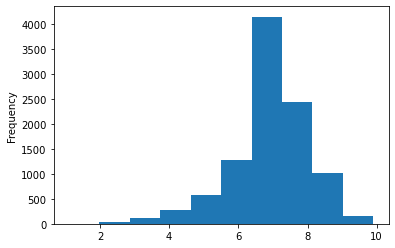

In [23]:
movies.RATING.plot.hist()
plt.show()

## As we observ above the more or less the mean and median values for RunTime is very much the same.Since the data is skewed, it is good to consider using the median value for replacing the missing values.

### Replacing RunTime Missing value with median value

In [24]:
Mean_RunTimeVal = movies.RunTime.median()
Mean_RunTimeVal

60.0

In [25]:
movies.RunTime.fillna(Mean_RunTimeVal,inplace=True)

In [26]:
movies.RunTime.isna().sum()

0

In [27]:
movies.isna().sum().sort_values(ascending=False)

Gross       9539
VOTES       1820
YEAR         644
GENRE         80
MOVIES         0
RATING         0
ONE_LINE       0
STARS          0
RunTime        0
dtype: int64

### Dropping gross column since it has amore than 95% na as data

In [28]:
movies.drop('Gross',
  axis='columns', inplace=True)

In [29]:
movies.shape

(9999, 8)

In [30]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE_LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.2,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,60.0


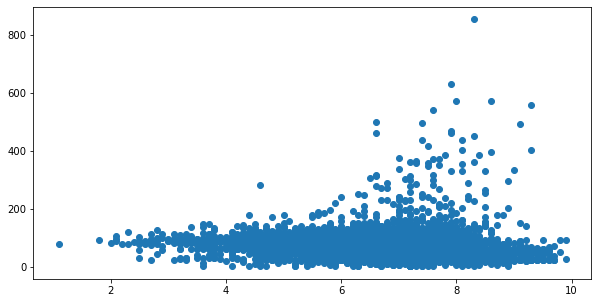

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(movies.RATING, movies.RunTime)
plt.show()